<a href="https://colab.research.google.com/github/robbinlin/robbinlin/blob/master/Curiosity_example_(public_20211005).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install factor_analyzer

     |████████████████████████████████| 40 kB 4.7 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40395 sha256=9b493e85cc1da98eabd25b0fc339e456662e4dfef310f93413e36e6b615775ed
  Stored in directory: /root/.cache/pip/wheels/8d/9e/4c/fd4cb92cecf157b13702cc0907e5c56ddc48e5388134dc9f1a
Successfully built factor-analyzer


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import sklearn.datasets, sklearn.decomposition
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import decomposition
import scipy
%tensorflow_version 1.4
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense, Layer, InputSpec
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers, activations, initializers, constraints, Sequential
from keras import backend as K
from keras.constraints import UnitNorm, Constraint

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.4`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving curiosity.csv to curiosity.csv


In [ ]:
import io
df = pd.read_csv(io.StringIO(uploaded['curiosity.csv'].decode('utf-8')))
df

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11
0,4,5,5,4,2,5,5,5,5,4,5
1,3,5,4,5,4,5,5,5,3,2,2
2,1,4,5,4,2,3,3,5,5,5,3
3,2,4,5,5,2,4,2,4,3,1,3
4,5,5,5,5,5,5,5,5,4,5,4
...,...,...,...,...,...,...,...,...,...,...,...
415,3,5,5,5,4,5,5,5,2,3,3
416,2,5,5,5,4,4,4,4,3,4,5
417,4,2,4,4,2,3,3,3,3,3,3
418,3,4,5,4,3,4,5,4,2,2,4


In [ ]:
df.columns

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11'], dtype='object')

In [ ]:
# Dropping missing values rows
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   C1      420 non-null    int64
 1   C2      420 non-null    int64
 2   C3      420 non-null    int64
 3   C4      420 non-null    int64
 4   C5      420 non-null    int64
 5   C6      420 non-null    int64
 6   C7      420 non-null    int64
 7   C8      420 non-null    int64
 8   C9      420 non-null    int64
 9   C10     420 non-null    int64
 10  C11     420 non-null    int64
dtypes: int64(11)
memory usage: 39.4 KB


In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(rotation=None)
fa.fit(df, 11)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.29844338, 1.61219085, 0.9478248 , 0.72411375, 0.54923999,
       0.47443823, 0.42359809, 0.31432479, 0.26272132, 0.25480483,
       0.13829996])

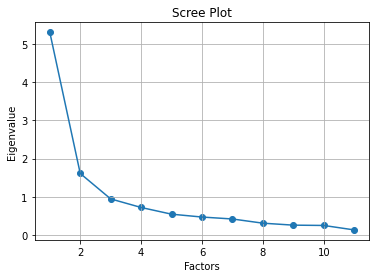

In [ ]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

PCA on 420 cases

In [ ]:
import numpy as np
import sklearn.datasets, sklearn.decomposition


mu = np.mean(scaled_data, axis=0)

pca = sklearn.decomposition.PCA()
pca_fit=pca.fit_transform(scaled_data)
print(pca_fit)
nComp = 3
Xhat = np.dot(pca.transform(scaled_data)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu
print(Xhat[0:3,])
print(scaled_data.shape)
print(Xhat.shape)

scaled_data=pd.DataFrame(data=scaled_data)

Xhat_argmax=Xhat[:,0:3].argmax(axis=1)
print(Xhat_argmax)



print (Xhat)
mse = mean_squared_error(scaled_data[0:419],Xhat[0:419] )
print(mse)
r2=r2_score(scaled_data[0:419],Xhat[0:419])
print(r2)

[[-1.65817925  0.95388636  0.4955272  ...  0.61539834  0.01424399
  -0.03251031]
 [-0.72473547 -1.6990825   0.18081158 ...  0.16682561 -0.17409021
   0.13751046]
 [ 0.97601266  1.58524118  2.05324669 ... -0.49199211  1.16792128
   0.14808121]
 ...
 [ 3.00156058  0.51287448 -0.9224719  ...  0.05385645 -0.62204444
  -0.20378558]
 [ 0.48326735 -0.96137303 -0.18460389 ...  0.551166   -0.34829892
  -0.9838479 ]
 [-0.56349856  1.98271727  2.0849606  ...  0.10737409  0.31848779
  -0.70971303]]
[[-0.1011546   0.4405421   0.36618154  0.5143873   0.22093012  0.48735122
   0.53534857  0.58817177  0.90929688  0.92879248  0.8328687 ]
 [ 0.26865606  0.47003242  0.69837617  0.56120005  0.18012016  0.48465789
   0.45512186  0.56326162 -0.59356365 -0.8740988  -0.66402687]
 [-1.91466093 -0.42211405 -0.32769794 -0.03863379 -1.34877816 -0.55276677
  -0.34819145  0.01444385  0.90992747  0.73797634  0.33113507]]
(420, 11)
(420, 11)
[1 2 2 2 0 1 0 0 0 2 0 1 2 2 0 1 2 0 2 1 0 0 0 0 1 2 0 2 2 0 0 0 0 2 0 0 2
 

In [ ]:
pca_3f = decomposition.PCA(n_components=3)
pca_3f_fit = pca_3f.fit_transform(scaled_data)

output_fit=pd.DataFrame(data=pca_3f_fit)
print(output_fit)

print(pca_3f.components_.shape)
print(pca_3f.components_)
loadings = pd.DataFrame(pca_3f.components_.T, columns=['PC1', 'PC2','PC3'])
loadings

            0         1         2
0   -1.658179  0.953886  0.495527
1   -0.724735 -1.699082  0.180812
2    0.976013  1.585241  2.053247
3    1.885772 -1.099359  1.043249
4   -2.729982  0.272096 -1.142828
..        ...       ...       ...
415 -1.230432 -1.545551  0.146751
416 -0.593222  0.581991  0.259287
417  3.001561  0.512874 -0.922472
418  0.483267 -0.961373 -0.184604
419 -0.563499  1.982717  2.084961

[420 rows x 3 columns]
(3, 11)
[[-0.23153726 -0.32625089 -0.31283741 -0.32584593 -0.297962   -0.36654688
  -0.35902019 -0.35388586 -0.2238837  -0.21387834 -0.25054243]
 [-0.13572772 -0.1320065  -0.25758753 -0.16340191 -0.03118659 -0.12845155
  -0.10590852 -0.14961809  0.46511174  0.60503907  0.48746789]
 [-0.71765194  0.05141763  0.18798214  0.2622322  -0.4911856   0.00419546
   0.08284799  0.29076959  0.19049172 -0.00604338 -0.09598775]]


,PC1,PC2,PC3
0,-0.231537,-0.135728,-0.717652
1,-0.326251,-0.132006,0.051418
2,-0.312837,-0.257588,0.187982
3,-0.325846,-0.163402,0.262232
4,-0.297962,-0.031187,-0.491186
5,-0.366547,-0.128452,0.004195
6,-0.359020,-0.105909,0.082848
7,-0.353886,-0.149618,0.290770
8,-0.223884,0.465112,0.190492
9,-0.213878,0.605039,-0.006043


Full data visualization

In [ ]:

# scaled_data['max_loading'] = Xhat[:,0:3].argmax(axis=1)
# scaled_data['max_class'] = np.expand_dims(Xhat_argmax, axis=1)
# scaled_data['predicted_class']=scaled_data['max_class']
# scaled_data['predicted_class'].value_counts()

# from numpy.random import seed
# seed(12345678)
# from tensorflow import set_random_seed
# set_random_seed(2)

# model_tsne_auto = TSNE(learning_rate = 200, n_components = 2, random_state =None, perplexity = 90, n_iter = 1000, verbose = 1)
# X_2d =  model_tsne_auto.fit_transform(pca_fit)
# prediction_en= pd.DataFrame(data=pca_fit)
# # # Visualize the data
# plt.scatter(-X_2d[:, 0], -X_2d[:, 1], c =scaled_data['predicted_class'], cmap = 'tab20') 
# plt.title('tSNE on PCA: n=420') 
# plt.xlabel("tSNE1") 
# plt.ylabel("tSNE2")

# #print(scaled_data[0:100])


encoder on n=420

In [ ]:
from numpy.random import seed
seed(12345678)
import tensorflow
print(tensorflow.__version__)
tensorflow.random.set_random_seed(2)

nb_epoch = 100
batch_size = 16
#sample1=scaled_data[0:100]
sample1=pd.DataFrame(data=scaled_data)
input_dim = sample1.shape[1] #num of predictor variables, 
encoding_dim = 3
learning_rate = 1e-3

1.15.2


In [ ]:
encoder = Dense(encoding_dim, activation="linear", input_shape=(input_dim,), use_bias = True) 
decoder = Dense(input_dim, activation="linear", use_bias = True)

deepautoencoder = Sequential()

# Encoder Layers
deepautoencoder.add(Dense( 2*encoding_dim, input_shape=(input_dim,), activation='linear'))
deepautoencoder.add(Dense( 2*encoding_dim, activation='linear'))

# Decoder Layers
deepautoencoder.add(Dense( encoding_dim, activation='linear',name = "bottleneck"))
deepautoencoder.add(Dense( 2 *encoding_dim, activation='linear'))
deepautoencoder.add(Dense(2 * encoding_dim, activation='linear'))

deepautoencoder.add(Dense(input_dim, activation='linear'))
deepautoencoder.compile(metrics=['accuracy'],loss='mean_squared_error',optimizer='sgd')
deepautoencoder.summary()

deepautoencoder.fit(sample1, sample1,
                epochs=nb_epoch,
                batch_size=batch_size,
                shuffle=False,
                verbose=0)
encoder = Model(deepautoencoder.input, deepautoencoder.get_layer('bottleneck').output) 
bottleneck_representation = encoder.predict(sample1) 
prediction_en= pd.DataFrame(data=bottleneck_representation)
print (prediction_en.head())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
bottleneck (Dense)           (None, 3)                 21        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 24        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_7 (Dense)              (None, 11)                77        
Total params: 278
Trainable params: 278

[[ 0.15745759  0.45180386  0.20870245 ...  0.81364405  0.9558935
   0.85265213]
 [ 0.2189636   0.13404271  0.5622539  ... -0.20624565 -0.817738
  -0.84920883]
 [-0.65069294 -0.6359357  -0.98853296 ...  0.8048442   0.8610615
   0.22164395]
 ...
 [-0.5243566  -0.88196945 -0.8807384  ... -0.8104059  -0.50123245
  -0.40807888]
 [ 0.42124742  0.2955516   0.5157963  ... -1.1482304  -0.72402716
   0.12074361]
 [-0.25177327  0.02530481 -0.4270762  ...  1.2080145   1.3908166
   0.9154975 ]]
0.32288699709682744
0.6771130029031723
(420, 11)
[t-SNE] Computing 271 nearest neighbors...
[t-SNE] Indexed 420 samples in 0.000s...
[t-SNE] Computed neighbors for 420 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 420 / 420
[t-SNE] Mean sigma: 1.327238
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.173386
[t-SNE] KL divergence after 1000 iterations: 0.252817


Text(0, 0.5, 'tSNE2')

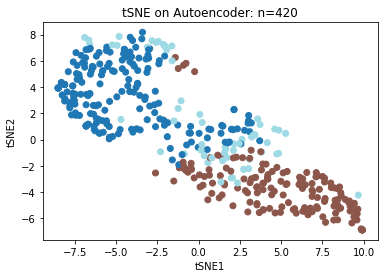

In [ ]:
#print(scaled_data[0:100])
Xhat_deepencoder = deepautoencoder.predict(sample1)
print (Xhat_deepencoder)
mse = mean_squared_error(scaled_data,Xhat_deepencoder )
print(mse)
r2=r2_score(scaled_data,Xhat_deepencoder)
print(r2)
print(sample1.shape)
prediction_en['max_loading'] = prediction_en.max(axis=1)
prediction_en['max_class'] = prediction_en.idxmax(axis=1)
sample1['predicted_class_en']=prediction_en['max_class']
sample1['predicted_class_en'].value_counts()
model_tsne_auto = TSNE(learning_rate = 200, n_components = 2, random_state =None, perplexity = 90, n_iter = 1000, verbose = 1)
X_2d =  model_tsne_auto.fit_transform(bottleneck_representation)

# # Visualize the data
plt.scatter(-X_2d[:, 0], -X_2d[:, 1], c =sample1['predicted_class_en'], cmap = 'tab20') 
plt.title('tSNE on Autoencoder: n=420') 
plt.xlabel("tSNE1") 
plt.ylabel("tSNE2")



In [ ]:
sample1.to_csv("sample1.csv")

In [ ]:
wt=np.round(np.transpose(deepautoencoder.layers[0].get_weights()[0]), 3)
encoder_wt=pd.DataFrame(data=wt[0:,0:],
  index=[i for i in range(wt.shape[0])],
  columns=['C'+str(i) for i in range(1,wt.shape[1]+1)])
encoder_wt.shape
encoder_wt_abs=abs(encoder_wt)
encoder_wt_abs_sort=encoder_wt_abs.sort_values(by=['C1', 'C2','C3'],ascending=False)
encoder_wt
encoder_wtDf  = pd.DataFrame(encoder_wt, index=[0,1, 2])
print(encoder_wtDf.transpose())
encoder_wtDf.T

         0      1      2
C1   0.355  0.218  0.384
C2  -0.131  0.450 -0.224
C3  -0.571  0.121  0.287
C4  -0.055  0.146  0.664
C5  -0.124  0.441  0.025
C6  -0.513 -0.002  0.523
C7  -0.292  0.229  0.570
C8  -0.309  0.081 -0.301
C9  -0.452 -0.260  0.048
C10  0.210 -0.018  0.041
C11  0.418  0.616 -0.260


,0,1,2
C1,0.355,0.218,0.384
C2,-0.131,0.450,-0.224
C3,-0.571,0.121,0.287
C4,-0.055,0.146,0.664
C5,-0.124,0.441,0.025
C6,-0.513,-0.002,0.523
C7,-0.292,0.229,0.570
C8,-0.309,0.081,-0.301
C9,-0.452,-0.260,0.048
C10,0.210,-0.018,0.041


In [ ]:
print(type(sample1))

#sample1 = sample1.drop('predicted_class_en', 1)
print(sample1)
print(sample1.iloc[:,0:11])

<class 'pandas.core.frame.DataFrame'>
            0         1        2  ...         9        10  predicted_class_en
0    0.715767  0.816521  0.54539  ...  0.428437  1.406925                   0
1   -0.051126  0.816521 -0.54539  ... -1.046510 -0.925609                   0
2   -1.584913 -0.210242  0.54539  ...  1.165910 -0.148097                   1
3   -0.818020 -0.210242  0.54539  ... -1.783983 -0.148097                   1
4    1.482661  0.816521  0.54539  ...  1.165910  0.629414                   0
..        ...       ...      ...  ...       ...       ...                 ...
415 -0.051126  0.816521  0.54539  ... -0.309036 -0.148097                   0
416 -0.818020  0.816521  0.54539  ...  0.428437  1.406925                   1
417  0.715767 -2.263768 -0.54539  ... -0.309036 -0.148097                   1
418 -0.051126 -0.210242  0.54539  ... -1.046510  0.629414                   1
419 -1.584913 -0.210242  0.54539  ...  1.165910  1.406925                   0

[420 rows x 12 columns]
 

encoder on n=100

In [ ]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_35 (Dense)             (None, 6)                 42        
_________________________________________________________________
bottleneck (Dense)           (None, 3)                 21        
_________________________________________________________________
dense_36 (Dense)             (None, 6)                 24        
_________________________________________________________________
dense_37 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_38 (Dense)             (None, 11)                77        
Total params: 278
Trainable params: 278
Non-trainable params: 0
________________________________________________________

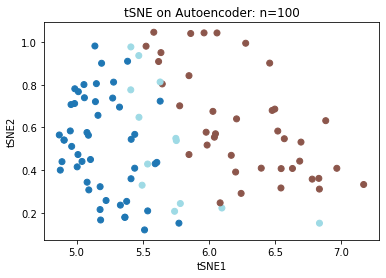

In [ ]:
from numpy.random import seed
seed(12345678)
import random
import tensorflow
tensorflow.random.set_random_seed(2)

nb_epoch = 100
batch_size = 16
scaled_data=pd.DataFrame(data=scaled_data)
sample1=scaled_data.sample(n=100, random_state = 2)
sample1=pd.DataFrame(data=sample1)
input_dim = sample1.shape[1] #num of predictor variables, 
encoding_dim = 3
learning_rate = 1e-3



encoder = Dense(encoding_dim, activation="linear", input_shape=(input_dim,), use_bias = True) 
decoder = Dense(input_dim, activation="linear", use_bias = True)

deepautoencoder = Sequential()



# Encoder Layers
deepautoencoder.add(Dense( 2*encoding_dim, input_shape=(input_dim,), activation='linear'))
deepautoencoder.add(Dense( 2*encoding_dim, activation='linear'))

# Decoder Layers
deepautoencoder.add(Dense( encoding_dim, activation='linear',name = "bottleneck"))
deepautoencoder.add(Dense( 2 *encoding_dim, activation='linear'))
deepautoencoder.add(Dense(2 * encoding_dim, activation='linear'))
deepautoencoder.add(Dense(input_dim, activation='linear'))
deepautoencoder.compile(metrics=['accuracy'],loss='mean_squared_error',optimizer='sgd')
deepautoencoder.summary()

deepautoencoder.fit(sample1, sample1,
                epochs=nb_epoch,
                batch_size=batch_size,
                shuffle=False,
                verbose=0)
encoder = Model(deepautoencoder.input, deepautoencoder.get_layer('bottleneck').output) 
bottleneck_representation = encoder.predict(sample1) 
prediction_en= pd.DataFrame(data=bottleneck_representation)
print (prediction_en.head())
prediction_en['max_loading'] = prediction_en.max(axis=1)
prediction_en['max_class'] = prediction_en.idxmax(axis=1)
print(prediction_en)
sample1['predicted_class_en']=prediction_en['max_class']
print(sample1['predicted_class_en'].value_counts())
model_tsne_auto = TSNE(learning_rate = 200, n_components = 2, random_state =None, perplexity = 90, n_iter = 1000, verbose = 1)
X_2d =  model_tsne_auto.fit_transform(bottleneck_representation)
print(X_2d.shape)
# # Visualize the data
plt.scatter(-X_2d[:, 0], -X_2d[:, 1], c=prediction_en['max_class'], cmap = 'tab20') 
plt.title('tSNE on Autoencoder: n=100') 
plt.xlabel("tSNE1") 
plt.ylabel("tSNE2")

print(scaled_data[0:100])
# Xhat_deepencoder = deepautoencoder.predict(sample1.iloc[:,0:11])
# print (Xhat_deepencoder)
# mse = mean_squared_error(sample1.iloc[:,0:11],Xhat_deepencoder )
# print(mse)
# r2=r2_score(sample1.iloc[:,0:11],Xhat_deepencoder)
# print(r2)

In [ ]:
wt=np.round(np.transpose(deepautoencoder.layers[0].get_weights()[0]), 3)
encoder_wt=pd.DataFrame(data=wt[0:,0:],
  index=[i for i in range(wt.shape[0])],
  columns=['C'+str(i) for i in range(1,wt.shape[1]+1)])
encoder_wt.shape
encoder_wt_abs=abs(encoder_wt)
encoder_wt_abs_sort=encoder_wt_abs.sort_values(by=['C1', 'C2','C3'],ascending=False)
encoder_wt
encoder_wtDf  = pd.DataFrame(encoder_wt, index=[0,1, 2])
print(encoder_wtDf.transpose())
encoder_wtDf.T



         0      1      2
C1   0.423  0.112  0.263
C2  -0.008  0.384 -0.128
C3  -0.651  0.088  0.338
C4  -0.036  0.216  0.559
C5  -0.243  0.373  0.158
C6  -0.462 -0.173  0.471
C7  -0.246  0.363  0.594
C8  -0.013  0.148 -0.491
C9  -0.622 -0.288 -0.042
C10  0.137 -0.073  0.102
C11  0.145  0.527 -0.150


,0,1,2
C1,0.423,0.112,0.263
C2,-0.008,0.384,-0.128
C3,-0.651,0.088,0.338
C4,-0.036,0.216,0.559
C5,-0.243,0.373,0.158
C6,-0.462,-0.173,0.471
C7,-0.246,0.363,0.594
C8,-0.013,0.148,-0.491
C9,-0.622,-0.288,-0.042
C10,0.137,-0.073,0.102


In [ ]:
#C1 :I enjoy collecting and calculating statistics of my favorite basketball team.
#C5 :I enjoy reading articles about basketball players, teams, events, and games.
#C10 :I am eager to learn more about basketball.
#C11 :I enjoy any movement that occurs during a basketball game.

#C2 :I often imagine how my favorite basketball team is playing to defeat their opponent.
#C3 :I enjoy exploring my favorite basketball stadiums or facilities.
#C6 :I am interested in learning how much it costs to build a brand new basketball stadium.
#C8 :I am interested in learning how large a basketball court is.

#C4 :Watching basketball games with my friends is joyful.
#C7 :When I miss a game, I often look for information on television, the internet, or newspaper to catch the game results.
#C9 :I enjoy probing deeply into basketball.

PCA on n=100

In [ ]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [ ]:
import numpy as np
import sklearn.datasets, sklearn.decomposition
sample1=scaled_data[0:100]
sample1=pd.DataFrame(data=sample1)

mu = np.mean(sample1, axis=0)

pca = sklearn.decomposition.PCA()
pca_fit=pca.fit_transform(sample1)
print(pca_fit)
nComp = 3
Xhat = np.dot(pca.transform(sample1)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu
print(Xhat[0:3,])
print(sample1.shape)
print(Xhat.shape)

[[-1.36354890e+00 -1.07299552e+00  3.00306506e-01 ... -7.36197574e-01
   1.71575605e-01  5.87727090e-02]
 [-3.64313253e-01  1.78776506e+00  5.61770194e-01 ...  2.16653438e-01
  -5.69792159e-01 -7.28699437e-02]
 [ 1.03543129e+00 -1.97819763e+00  1.85040038e+00 ... -6.13643149e-01
   3.23901704e-01  2.52542525e-01]
 ...
 [-5.64718942e-02  1.92964399e+00 -1.50537209e+00 ...  2.85978280e-04
   6.80495227e-01  4.70580606e-01]
 [ 4.15313600e+00 -2.29479641e-01 -5.52532939e-01 ...  2.61255047e-01
  -1.90663521e-01 -8.47504616e-02]
 [-2.03049147e+00 -3.94968842e-01 -4.02077961e-01 ...  3.28918675e-01
   1.28398117e-01  6.31878842e-02]]
[[-0.23980465  0.4695544   0.38051167  0.40701319  0.2241351   0.49773642
   0.50980132  0.47745202  0.92546013  0.92221807  0.96121353]
 [ 0.18513803  0.37782809  0.55334621  0.58397457  0.29214119  0.61403192
   0.57354912  0.67980694 -0.51956457 -0.9442418  -0.87336531]
 [-1.9654799  -0.2885768  -0.24774915 -0.2691464  -1.32786574 -0.35716687
  -0.44260841 -0

In [ ]:
Xhat_argmax=Xhat[:,0:3].argmax(axis=1)
sample1['max_loading'] = Xhat.max(axis=1)
sample1['max_class'] = np.expand_dims(Xhat_argmax, axis=1)
sample1['predicted_class']=sample1['max_class']
sample1['predicted_class'].value_counts()


0    48
2    29
1    23
Name: predicted_class, dtype: int64

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 4.406221
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.542862
[t-SNE] KL divergence after 900 iterations: 0.013819


Text(0, 0.5, 'tSNE2')

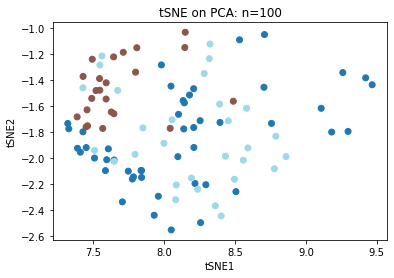

In [ ]:
from numpy.random import seed
seed(12345678)
from tensorflow import set_random_seed
set_random_seed(2)

model_tsne_auto = TSNE(learning_rate = 200, n_components = 2, random_state =None, perplexity = 90, n_iter = 1000, verbose = 1)
X_2d =  model_tsne_auto.fit_transform(pca_fit)
prediction_en= pd.DataFrame(data=pca_fit)
# # Visualize the data
plt.scatter(-X_2d[:, 0], -X_2d[:, 1], c =sample1['predicted_class'], cmap = 'tab20') 
plt.title('tSNE on PCA: n=100') 
plt.xlabel("tSNE1") 
plt.ylabel("tSNE2")



In [ ]:
#print(scaled_data[0:100])
Xhat_deepencoder = deepautoencoder.predict(scaled_data[0:100])
print (Xhat_deepencoder)
mse = mean_squared_error(scaled_data[0:100],Xhat_deepencoder )
print(mse)
r2=r2_score(scaled_data[0:100],Xhat_deepencoder)
print(r2)

[[ 2.2662666e-01  5.0576156e-01  5.9709840e-02 ...  5.3504169e-01
   5.5196840e-01  3.9396337e-01]
 [ 3.6095092e-01  1.3564558e-01  3.4270638e-01 ...  3.0995354e-01
   1.9180430e-01 -7.2806612e-02]
 [-4.3740192e-01 -3.2316729e-01 -1.0057379e+00 ...  1.8291473e-03
   2.6512876e-01 -5.7957251e-02]
 ...
 [-2.5309920e-03  1.4331675e-01 -3.3651659e-01 ...  3.4245339e-01
   4.5342085e-01  1.5949360e-01]
 [-9.9531412e-01 -1.4557399e+00 -2.0708888e+00 ... -4.8800609e-01
   3.7669796e-02 -8.8579863e-01]
 [ 4.9943140e-01  1.0795728e+00  5.4449332e-01 ...  8.2100511e-01
   7.3139149e-01  8.2020056e-01]]
0.4402996503755542
0.5387544819357197
